## US Presidential Campaign Data Exploration
### Dan Sedano
### 02/05/2021

Instructions:
- Problems 1-12 are shown in code cells below
- Each problem begins with #@
- Insert your code below the problem line
- Do not make changes outside the problem cells, except to change the name and date above
- Be sure to include plot titles, labels, etc. as shown

An exploration of California campaign contribution data for the 2016 US presidential election.

In [1]:
%matplotlib inline
# %config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 8,6
sns.set_context('talk')   # 'talk' for slightly larger

In [2]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

In [3]:
# This is a randomly-sample subset of the full data set.
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/campaign-ca-2016-sample.csv")

Which candidates received the most contributions?  

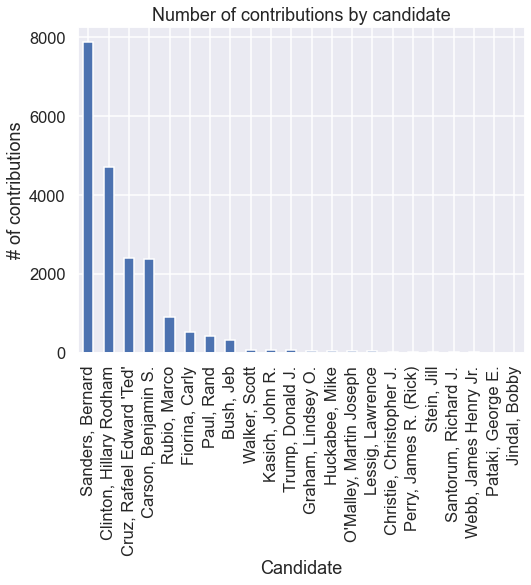

In [17]:
#@ 1 Show the number of contributions by candidate using a barplot.  
# Hint: use value_counts(), and use a pandas bar plot.

# compute
df["cand_nm"].value_counts().plot.bar()
# plot elements
plt.title("Number of contributions by candidate")
plt.xlabel('Candidate')
plt.ylabel('# of contributions')
# customize
plt.yticks(np.arange(0,10_000,2_000))
plt.show()

Let's look at the amount of the contributions, instead of the number of contributions.  Which candidates had the highest median contribution amounts?  

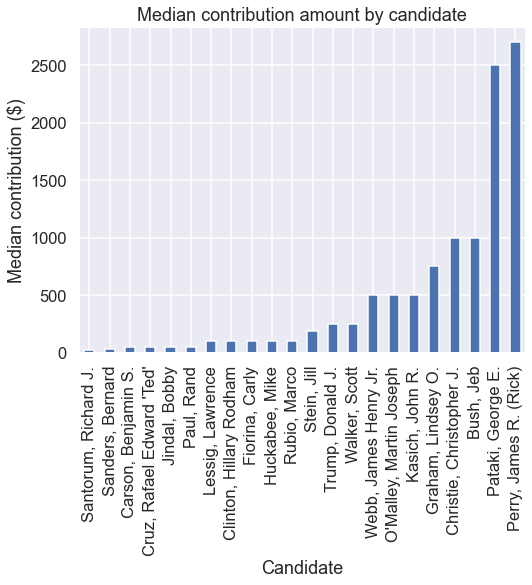

In [18]:
#@ 2 Show the median contribution amount by candidate.

# compute
data = df.groupby(by='cand_nm')['contb_receipt_amt'].median().sort_values()
# plot
data.plot.bar()
# plot elements
plt.title('Median contribution amount by candidate')
plt.xlabel('Candidate')
plt.ylabel('Median contribution ($)')
plt.show()

What is the distribution of the contribution amounts?  There are a small number of very large amounts, which make it hard to display the distribution.  Also, there are some negative contribution amounts that seem to reflect returned contributions.  Therefore, let's focus on contributions ranging from 0 to 3,000 dollars.

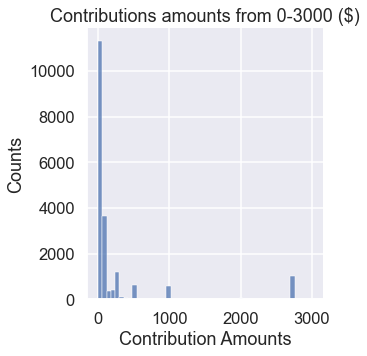

In [19]:
#@ 3 Create a histogram showing contribution amounts.  Show
# contributions from 0 - 3000 dollars only.  Create the
# histogram with Seaborn.

# compute
mask = (df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <=3000)
data = df.loc[mask,'contb_receipt_amt']
# plot
sns.displot(data,bins=50)
# plot elements
plt.title("Contributions amounts from 0-3000 ($)")
plt.ylabel("Counts")
plt.xlabel("Contribution Amounts")
# customize
plt.xticks([0,1000,2000,3000])
plt.show()

It appears that most contributions are small.  Let's restrict our attention to an even smaller range of contributions to get a better idea of how small contributions are distributed.

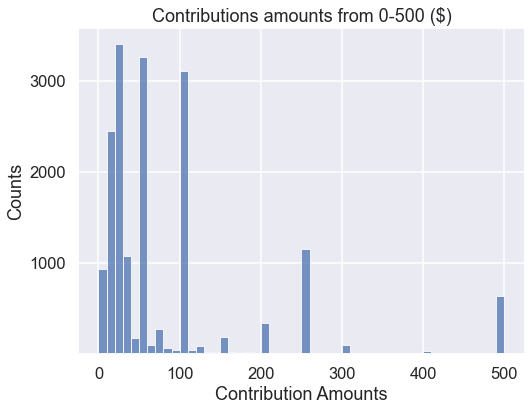

In [7]:
#@ 4 Create a histogram showing contribution amounts.  Show
# contributions from 0 - 500 dollars only.  Create the
# histogram with Seaborn.

mask = (df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <=500)
# compute
data = df.loc[mask,'contb_receipt_amt']
# plot
sns.histplot(data,bins=50)
# plot elements
plt.title("Contributions amounts from 0-500 ($)")
plt.ylabel("Counts")
plt.xlabel("Contribution Amounts")
# customize
plt.yticks([1000,2000,3000])
plt.show()

The appearance of a histogram is sensitive to the number of bins that are used and where the bin edges lie.  Let's look at the contribution amounts again using a density plot.

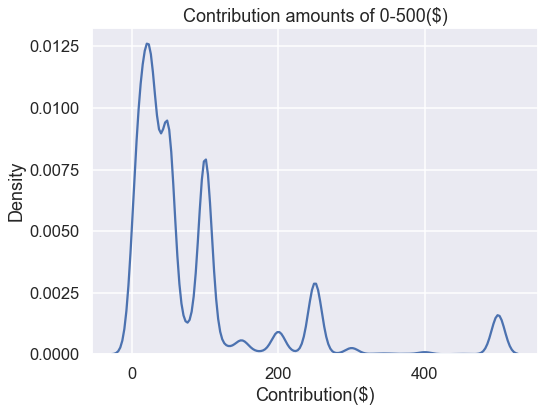

In [8]:
#@ 5 Create a density plot (sometimes called a kernel density
# plot) showing contribution amounts.  Show contributions from 
# 0 - 500 dollars only.  Create the density plot with Seaborn.
# histogram use Seaborn.
# Hint: you may want to start by creating a series containing
# the contb_receipt_amt values from 0-500.

mask = (df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 500)
# compute
data = df.loc[mask,'contb_receipt_amt']
# plot
fig = sns.kdeplot(data, bw_adjust=0.60)
# plot elements
plt.title('Contribution amounts of 0-500($)')
plt.xlabel('Contribution($)')
# customize
plt.xticks([0,200,400])
plt.yticks(np.arange(0,0.0150,0.0025))
plt.show()

Let's compare the size of contributions between candidates Rubio and Cruz.  Did one of them tend to get larger-sized contributions?

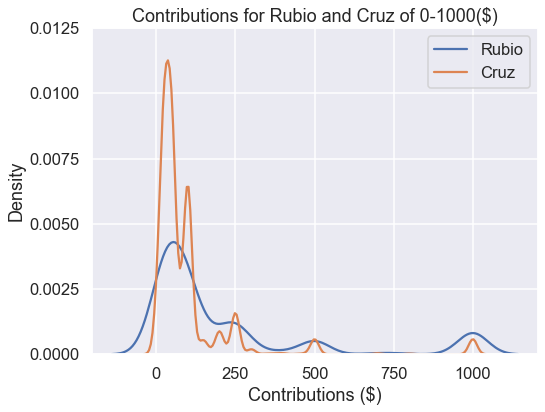

In [9]:
#@ 6 Create a "double density plot" showing the contributions for
# Rubio and Cruz.  Show contributions in the range of 0-1000 dollars
# only.  Be sure to include a legend.
# Hint: you can create two series, one for 0-1000 contributions to
# Rubio, and another for 0-1000 contributions to Cruz.
# Remember that you can superimpose plots by simply plotting one
# after another.

mask = (df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <=1000)
# Marco Rubio Chart
rubio_mask = df['cand_nm'].str.contains("rubio", case=False)
rubio = df.loc[mask & rubio_mask,'contb_receipt_amt']
sns.kdeplot(rubio, bw_adjust=0.60)
# Ted Cruz Chart
cruz_mask = df['cand_nm'].str.contains("cruz", case=False)
cruz = df.loc[mask & cruz_mask,'contb_receipt_amt']
# plot
sns.kdeplot(cruz, bw_adjust=0.40)
# plot elements
plt.title('Contributions for Rubio and Cruz of 0-1000($)')
plt.xlabel('Contributions ($)')
plt.ylabel('Density')
plt.legend(['Rubio', 'Cruz'])
# customizations
plt.yticks(np.arange(0,0.0150,0.0025))
plt.xticks(np.arange(0,1250,250))
plt.show()

Rubio and Cruz were Republican candidates.  Let's look at a pair of Democratic candidates.

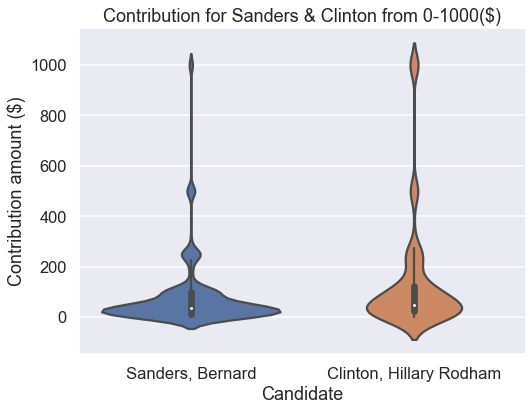

In [10]:
#@ 7 Show the contributions of 0-1000 for Clinton and Sanders.  
# Use a seaborn violin plot.
# Hint: create a modified version of the data frame that contains only
# contributions for Sanders and Clinton, and only contains contributions
# from 0 to 1000 dollars.  Then use Seaborn's violinplot.

range_mask = (df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 1000)
# compute
sanders_clinton_mask = df['cand_nm'].str.contains('sanders|clinton',case=False)
sanders_clinton = df.loc[sanders_clinton_mask & range_mask,['cand_nm', 'contb_receipt_amt']]
# plot
sns.violinplot(x=sanders_clinton['cand_nm'], y=sanders_clinton['contb_receipt_amt'])
# plot elements
plt.title("Contribution for Sanders & Clinton from 0-1000($)")
plt.xlabel("Candidate")
plt.ylabel("Contribution amount ($)")
plt.show()

Which occupations are associated with the greatest number of contributions?  This will be interesting, but we need to keep in mind that the occupation with the greatest number of contributions might just be the most common occupation.

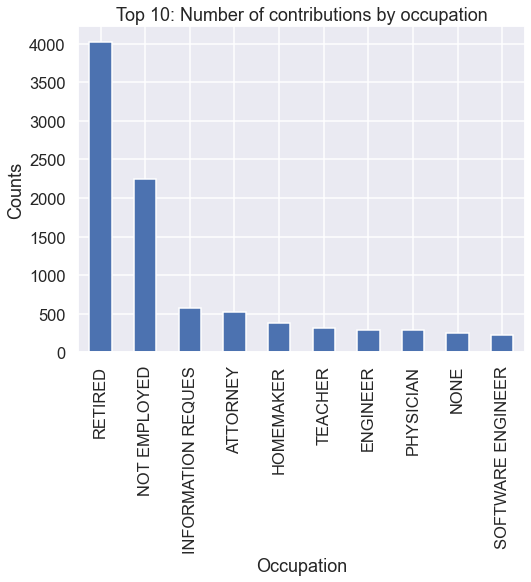

In [11]:
#@ 8 Create a bar plot showing th total number of contributions by occupation, 
# for the 10 occupations with the largest number of contributions.  Use
# Pandas for the bar plot.  Limit the occupation names to 18 characters.
# Hint: to limit the occupation names to 18 characters, you can create a 
# new column 'short_occ' by using pd.Series.str.slice on the 
# 'contbr_occupation' column.

# compute
df['short_occ'] = df['contbr_occupation'].str.slice(stop=18)
data = df['short_occ'].value_counts().sort_values(ascending=False).head(10)
# plot
data.plot.bar()
# plot elements
plt.title('Top 10: Number of contributions by occupation')
plt.xlabel("Occupation")
plt.ylabel("Counts")
plt.show()

We can classify contributors as either employed, unemployed, or retired.  Among these groups, which makes the most contributions?

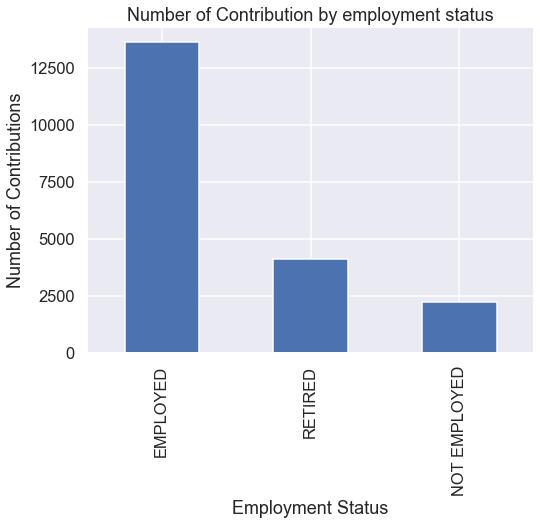

In [12]:
#@ 9 Create a new column "employment_status", derived from the 
# contbr_occupation column.  The value of employment_status should 
# be "EMPLOYED" if contbr_occupation is not "RETIRED" or "NOT EMPLOYED", 
# and should be the original contbr_occupation otherwise.  Show the 
# number of contributions by employment status as a bar plot.
# Hint: to create the new column, consider creating a function that 
# takes as input a contbr_occupation value and returns an employement 
# status value.  Then use this function with 'apply'.

# lump occupations into a category
def employment_status(x):
    if "RETIRED" in x:
        return "RETIRED"
    elif "NOT EMPLOYED" in x:
        return "NOT EMPLOYED"
    else:
        return "EMPLOYED"
# replace nan values with not employed    
df['contbr_occupation'].fillna("NA", inplace=True)
# Compute
df['employment_status'] = df['contbr_occupation'].apply(employment_status)
# Plot
df['employment_status'].value_counts().plot.bar()
# plot elements
plt.title("Number of Contribution by employment status")
plt.xlabel("Employment Status")
plt.ylabel("Number of Contributions")
# customize
plt.yticks(np.arange(0,13_000,2_500))
plt.show()

Do retired contributors tend to make smaller contributions than employed contributors?  It seems likely, but what does the data say?

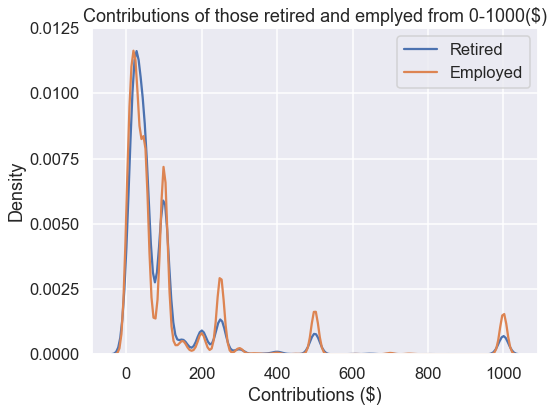

In [13]:
#@ 10 Create a double density plot showing the distribution of
# contribution amounts from those with employment_status values
# of RETIRED and EMPLOYED.  Include only contributions of $0-1000.
# Use Seaborn, and make sure to include
# a legend.
# Hint: consider creating two series, one for the contributions
# from retired contributors, and one for the contributions from
# employed contributors.
# masks

range_mask = (df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <=1000)
retired_mask = df['employment_status'] == 'RETIRED'
employed_mask = df['employment_status'] == 'EMPLOYED'
# compute
retired = df.loc[retired_mask & range_mask,'contb_receipt_amt']
employed = df.loc[employed_mask & range_mask,'contb_receipt_amt']
# plot
sns.kdeplot(retired, bw_adjust=0.40)
sns.kdeplot(employed, bw_adjust=0.30)
# plot elements
plt.title('Contributions of those retired and emplyed from 0-1000($)')
plt.xlabel("Contributions ($)")
plt.ylabel('Density')
plt.legend(['Retired','Employed'])
# customize
plt.yticks(np.arange(0,0.0150,0.0025))
plt.show()

It appears that contributions from the retired and the employed are pretty similar, although there is a significant difference when you focus on larger contributions.  Let's look more into the size of contributions from those who are employed, retired, or unemployed.  

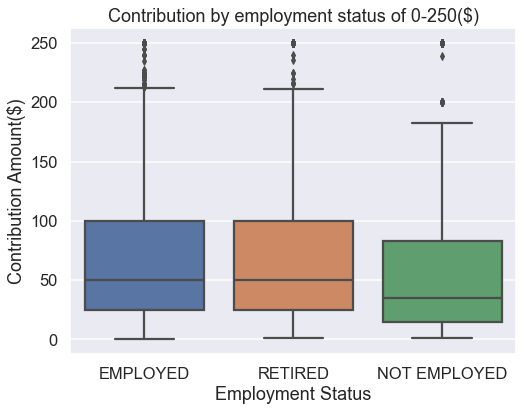

In [14]:
#@ 11 Create a box plot of contribution amounts for each employment
# status category.  Use Seaborn to create the bar plot, and show
# only contributions in the range of $0-250.
# Hint: you may want to create a version of df that contains only
# contributions in the 0-250 range.

# masks
range_mask = (df['contb_receipt_amt'] >= 0) & (df['contb_receipt_amt'] <= 250)
# compute
emp_cont = df.loc[range_mask,['contb_receipt_amt', 'employment_status']]
# plot
sns.boxplot(x=emp_cont['employment_status'], y=emp_cont['contb_receipt_amt'])
# plot elements
plt.title('Contribution by employment status of 0-250($)')
plt.xlabel('Employment Status')
plt.ylabel('Contribution Amount($)')
# customizations
plt.yticks(np.arange(0,300,50))
plt.show()

Previously we looked at the number of contributions from different occupations.  What about the size of contributions from different occupations?  Let's focus on a few occupations that contribute a lot.

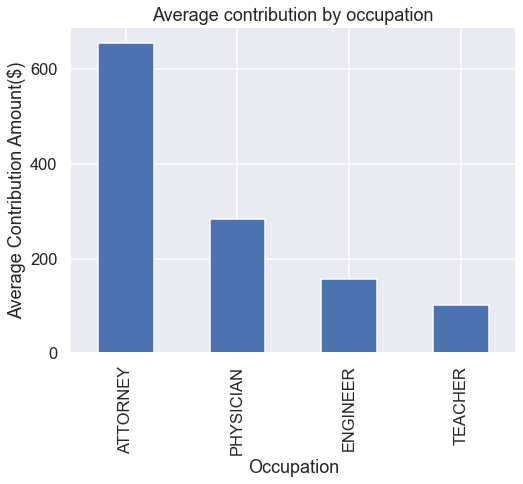

In [15]:
#@ 12 Create a bar plot showing the average contribution amount
# for the occupations 'ATTORNEY', 'TEACHER', 'ENGINEER' and 'PHYSICIAN'.
# Include contributions of any amount.  Use Pandas to create the bar plot.
# Show the occupations in decreasing order of mean contribution amount.
# Hint: you may want to create a new data frame that is like df except
# that it only includes data associated with the four occupations.
# To do this, consider the Pandas method pd.Series.isin 

# compute
occ_mask = df['contbr_occupation'].isin(['ATTORNEY', 'TEACHER', 'ENGINEER', 'PHYSICIAN'])
df_temp = df.loc[occ_mask, ['contbr_occupation', 'contb_receipt_amt']]
plot_data = df_temp.groupby('contbr_occupation').mean().sort_values(by='contb_receipt_amt', ascending=False)
# plot
plot_data.plot.bar()
# plot elements
plt.title('Average contribution by occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Contribution Amount($)')
plt.legend().remove()
# customization
plt.yticks(np.arange(0,800,200))
plt.show()